In [72]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [3]:
data_dir = "./Data/Train_Data"
batch_size = 32
img_height = 64
img_width = 64

In [5]:
train_augmentation = ImageDataGenerator(
    featurewise_center=True, zoom_range=0.5, rotation_range=0.2, horizontal_flip=True, vertical_flip=True, rescale=1/255, validation_split=0.2
)
train_ds = train_augmentation.flow_from_directory(
    directory=data_dir,
    class_mode="categorical",
    target_size=(img_height,img_width),
    batch_size=batch_size,
    subset="training"
)


Found 1120 images belonging to 2 classes.


In [6]:
val_ds = train_augmentation.flow_from_directory(
    directory=data_dir,
    class_mode="categorical",
    target_size=(img_height,img_width),
    batch_size=batch_size,
    subset="validation"
)

Found 279 images belonging to 2 classes.


In [51]:
vgg = VGG16(include_top=False, input_shape=(img_width, img_height, 3))


In [54]:
vgg.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [53]:
for layers in vgg.layers:
    layers.trainable = False

In [55]:
x = Flatten()(vgg.layers[-1].output)
x = Dense(2048, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dense(2, activation="sigmoid")(x)

In [58]:
x

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_18')>

In [68]:
model_final = Model(inputs = vgg.input, outputs = x)

In [69]:
opt = SGD(lr=0.001, momentum=0.9)
model_final.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])

In [70]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [27]:
x = GlobalAveragePooling2D()(vgg.output)
x = Flatten()(x)
x = Dense(2048, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dense(2, activation="softmax")(x)

model = Model(inputs=vgg.input, outputs=x)
model.compile(optimizer="Adadelta", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:

"""
Build model

"""
# model = keras.Sequential([
#     Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(img_height, img_width, 3)),
#     Conv2D(32, kernel_size=(3,3), activation="relu"),
#     MaxPooling2D((2,2)),
#     Dropout(0.25),
#     Conv2D(64, kernel_size=(3,3), activation="relu"),
#     Conv2D(64, kernel_size=(3,3), activation="relu"),
#     MaxPooling2D((2,2)),
#     Dropout(0.25),
#     Conv2D(32, kernel_size=(3,3), activation="relu"),
#     Conv2D(64, kernel_size=(3,3), activation="relu"),
#     MaxPooling2D((2,2)),
#     Dropout(0.2),
#     Flatten(),
#     Dense(64, activation="relu"),
#     Dropout(0.5),
#     Dense(2, activation="sigmoid")
# ])
#
# model.compile(optimizer="Adadelta", loss="categorical_crossentropy", metrics=["accuracy"])

In [29]:
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 16,290,370
Trainable params: 1,575,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [71]:
history = model_final.fit(
    train_ds,
    epochs=20,
    verbose=1,
    validation_data=val_ds,
    shuffle=True
)


/home/tdinh/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
35/35 [==============================] - 36s 1s/step - loss: 0.6713 - accuracy: 0.5705 - val_loss: 0.6511 - val_accuracy: 0.6272

In [104]:
model_final.save("trained.h5")

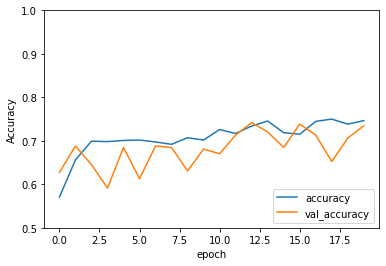

In [73]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")
plt.show()

In [85]:
"""
Du Doan
"""
import io
import cv2

def get_img(data_path):
    # Getting image array from path:
    img_size = 64
    img = cv2.imread(data_path)
    img = cv2.resize(img, (img_size, img_size))
    return img

In [99]:
img = get_img("./test_dog.jpg")

In [100]:
import numpy as np
X = np.zeros((1, 64, 64, 3), dtype="float64")

X[0] = img

In [101]:
Y = model_final.predict(X)

In [98]:
Y = np.argmax(Y, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [102]:
Y


array([[8.23558e-29, 1.00000e+00]], dtype=float32)